In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import scipy.stats
import eli5

In [8]:
df = pd.read_table('pba_test.tsv', sep='\t')

In [9]:
df.head()

,Word,Tag
0,Ia,O
1,menjabat,O
2,sebagai,O
3,Presiden,O
4,ketiga,O


In [10]:
df.shape

(1048575, 2)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Word    1015110 non-null  object
 1   Tag     1015124 non-null  object
dtypes: object(2)
memory usage: 16.0+ MB


In [12]:
class getsentence(object):
    
    def __init__(self, data):
        self.n_sent = 1.0
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["Word"].values.tolist(),
                                                    s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Word").apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [13]:
df.head()

,Word,Tag
0,Ia,O
1,menjabat,O
2,sebagai,O
3,Presiden,O
4,ketiga,O


In [9]:
class getsentence(object):
    
    def __init__(self, data):
        self.n_sent = 1.0
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["Word"].values.tolist(),
                                                    s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("sentence#").apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [38]:
df.head()

,Word,Tag
0,Ia,O
1,menjabat,O
2,sebagai,O
3,Presiden,O
4,ketiga,O


In [14]:
getter = getsentence(df)

In [16]:
sentences = getter.sentences

print(sentences[1])

[('!!!', 'O')]


In [18]:
words = list(set(df["Word"].values))
n_words = len(words)
print(n_words)

80068


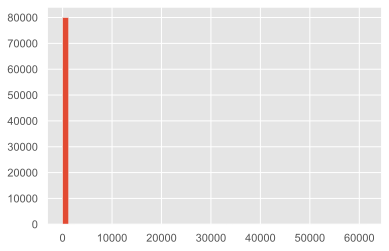

In [19]:
plt.style.use("ggplot")
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [20]:
maxlen = max([len(s) for s in sentences])
print ('Maximum sentence length:', maxlen)

Maximum sentence length: 61446


In [29]:
df.loc[df['Tag'] == 'Person', 'Word'].head()

40     Sadat
105    Anwar
106    Sadat
110    Hafez
112    Assad
Name: Word, dtype: object

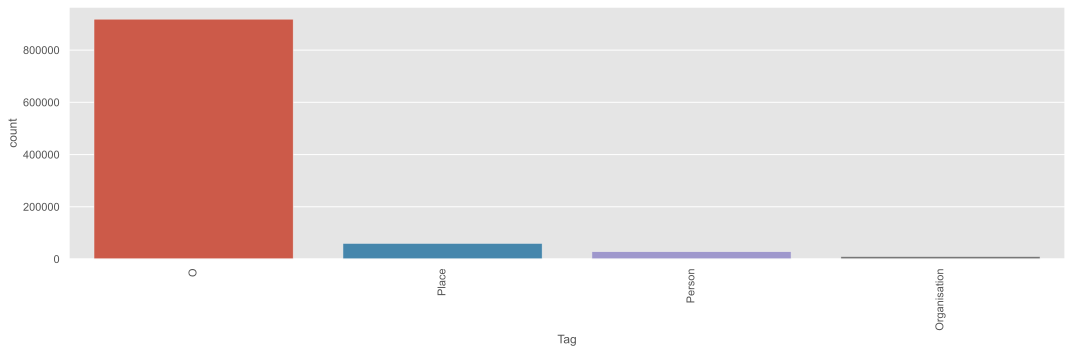

In [33]:
plt.figure(figsize=(15, 5))
ax = sns.countplot('Tag', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()